In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
def get_second_derivative_and_gamma(rmses_gamma, errcorrs_gamma, gammas):
    idx_okay = np.where(data['rmses_gamma'] != None)
    log_rmses_gamma = np.log(rmses_gamma[idx_okay])
    errcorrs_gamma = errcorrs_gamma[idx_okay]
    gammas = np.array(gammas)[idx_okay]
    
    second_derivative = np.diff(np.diff(errcorrs_g)) / np.diff(np.diff(rmses_g))
    
    elbow_idx = np.argmax(second_derivative)-2
    return elbow_idx, gammas[elbow_idx]

In [16]:
def load_filename(filename):
    f = open(filename, 'rb')
    data = pickle.load(f)
    f.close()
    return data

In [17]:
def plot_pareto(ax, filename):
    data = load_filename(filename)

    # everything else
    idx_okay = np.where(data['rmses'] != None)
    ax.plot( np.log(data['rmses'][idx_okay].astype(float)), data['errcorrs'][idx_okay].astype(float), 
             '.', color='gray')

    # pareto
    idx_okay = np.where(data['rmses_gamma'] != None)
    ax.plot( np.log(data['rmses_gamma'][idx_okay].astype(float)), 
             data['errcorrs_gamma'][idx_okay].astype(float),
             '.', color='red')
    ax.plot( np.log(data['rmses_gamma'][idx_okay].astype(float)), 
             data['errcorrs_gamma'][idx_okay].astype(float),
             color='red')

    # elbow
    if 0:
        elbow_idx, elbow_gamma = get_second_derivative_and_gamma(data['rmses_gamma'], 
                                                                 data['errcorrs_gamma'], 
                                                                 data['metadata']['gammas'])
        ax.plot( np.log(data['rmses_gamma'][11-2].astype(float)), data['errcorrs_gamma'][11-2].astype(float),
                 '*', color='red', markersize=20)

    #plt.xlim(-6,-4)
    #plt.ylim(0, 0.4)

# Need to check that BOTH (all) contains are in filename

In [18]:
def get_filenames(path, contains, does_not_contain=['~', '.pyc']):
    cmd = 'ls ' + '"' + path + '"'
    ls = os.popen(cmd).read()
    all_filelist = ls.split('\n')
    try:
        all_filelist.remove('')
    except:
        pass
    filelist = []
    for i, filename in enumerate(all_filelist):
        f = os.path.basename(filename)
        contains_all_parts = 1
        for contain in contains:
            if contain in f:
                contains_all_parts *= 1
            else:
                contains_all_parts *= 0
        if contains_all_parts:
            fileok = True
        else:
            fileok = False
        for nc in does_not_contain:
            if nc in f:
                fileok = False
        if fileok:
            filelist.append( os.path.join(path, filename) )
    return filelist

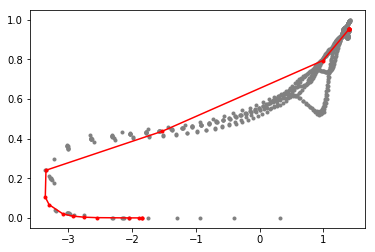

In [19]:
filename = '/home/caveman/Sync/LAB_Private/RESEARCH/code/PyNumDiff/notebooks/lorenz_x/pareto_data/pareto_data_savgoldiff_linear_model_lorenz_x_0.001_0.001_4.pickle'

fig = plt.figure()
ax = fig.add_subplot(111)

plot_pareto(ax, filename)

In [211]:
filenames = get_filenames('pareto_data/', ['lorenz_x', 'savgoldiff'])

In [212]:
filenames

['pareto_data/pareto_data_savgoldiff_linear_model_lorenz_x_0.001_0.001_4.pickle',
 'pareto_data/pareto_data_savgoldiff_linear_model_lorenz_x_0.001_0.01_4.pickle',
 'pareto_data/pareto_data_savgoldiff_linear_model_lorenz_x_0.001_0.1_4.pickle',
 'pareto_data/pareto_data_savgoldiff_linear_model_lorenz_x_0.01_0.001_4.pickle']

In [6]:
def dt_and_noise_to_num(dt, noise):
    if dt == 0.001:
        col = 1
    elif dt == 0.01:
        col = 2
    elif dt == 0.1:
        col = 3
        
    if noise == 0.001:
        row = 4
    elif noise == 0.01:
        row = 3
    elif noise == 0.1:
        row = 2
    elif noise == 0.5:
        row = 1
        
    print(row, col)
    num = (row-1)*3 + col
    
    return num

In [21]:
def make_figure_for_method_problem(method_parent, method, problem, timeseries_length=4):
    fig = plt.figure(figsize=(7,7))
    filenames = get_filenames('pareto_data/', [problem, method])
    
    for i, filename in enumerate(filenames):
        data = load_filename(filename)
        if data['metadata']['timeseries_length'] != timeseries_length:
            continue
            
        dt = data['metadata']['dt']
        noise = data['metadata']['noise']
        
        num = dt_and_noise_to_num(dt, noise)
        
        ax = fig.add_subplot(4, 3, num)
        plot_pareto(ax, filename)
        
        ax.set_xlim(-10,10)
        ax.set_ylim(-0.1, 1)
    

4 1
4 2
4 3
3 1
3 2
3 3


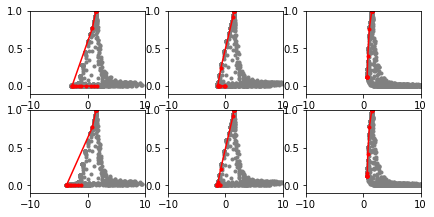

In [26]:

make_figure_for_method_problem('kalman_smooth', 'constant_acceleration', 'sine')


4 1
4 2
4 3
3 1
3 2
3 3
2 1
2 2
2 3
1 1
1 2
1 3


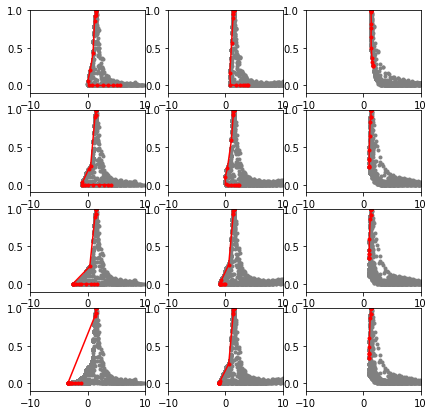

In [280]:
make_figure_for_method_problem('kalman_smooth', 'constant_acceleration', 'lorenz_x')

4 1
4 2
4 3
3 1
3 2
3 3
2 1
2 2
2 3
1 1
1 2
1 3


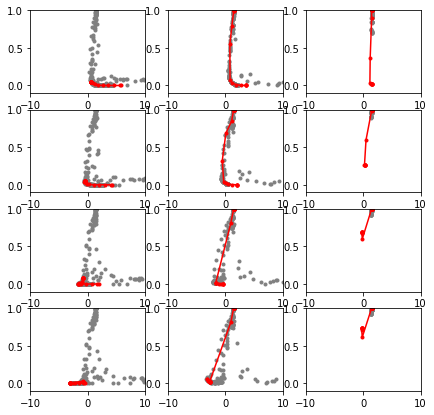

In [27]:
make_figure_for_method_problem('smooth_finite_difference', 'butterdiff', 'sine')

4 1
4 2
4 3
3 1
3 2
3 3
2 1
2 2
2 3
1 1
1 2
1 3


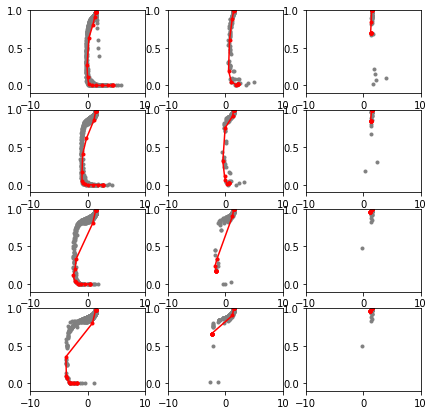

In [28]:
make_figure_for_method_problem('linear_model', 'savgoldiff', 'sine')

4 1
4 2
4 3
3 1
3 2
3 3
2 1
2 2
2 3
1 1
1 2
1 3


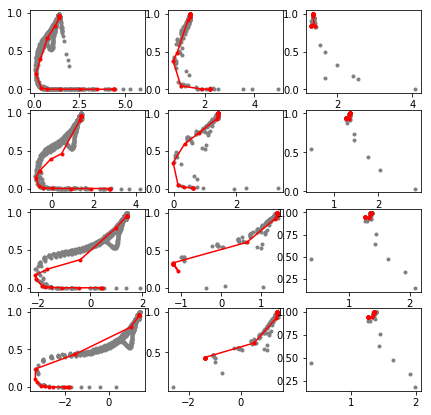

In [13]:
make_figure_for_method_problem('linear_model', 'savgoldiff', 'lorenz_x')

In [290]:
filenames = get_filenames('pareto_data/', ['lorenz_x', 'savgoldiff'])
    
data = load_filename(filenames[3])

In [291]:
data['metadata']['params']

[[7, 10],
 [7, 10],
 [5, 10],
 [8, 18],
 [3, 24],
 [3, 32],
 [3, 38],
 [3, 42],
 [3, 52],
 [3, 56],
 [1, 48],
 [1, 107],
 [1, 335],
 [1, 1000],
 [1, 1000],
 [1, 1000],
 [1, 1000],
 [1, 1000],
 [1, 1000],
 [1, 1000]]

In [197]:
filenames = get_filenames('pareto_data/', contains=['butterdiff', 'lorenz_x', '_4.', '0.1_0.1'])

In [198]:
filenames

['pareto_data/pareto_data_butterdiff_smooth_finite_difference_lorenz_x_0.1_0.1_4.pickle']

In [199]:
data = load_filename(filenames[0])

In [200]:
data['errcorrs_gamma']

array([], dtype=float64)

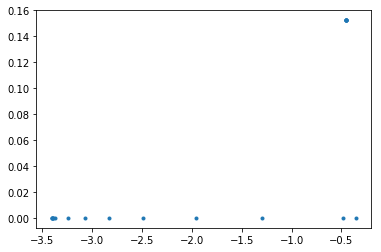

In [163]:
plt.plot(np.log(data['rmses_gamma']), data['errcorrs_gamma'], '.')

In [264]:
r1 = np.random.normal(0, 1, [10,10])

In [265]:
r2 = np.random.normal(2, 1, [10,10])

In [266]:
dr = r2-r1

In [267]:
r = np.mean([r1, r2], axis=0)

In [268]:
v_over_a = (r) / (r**2 + dr)

In [269]:
np.mean(v_over_a)

0.014686531701555232

In [270]:
np.mean(r) / (np.mean(r)**2 + np.mean(dr))

0.3363337021407247

In [239]:
np.mean(a1 - a2)

-2.339315974356083

In [240]:
np.mean(a1) - np.mean(a2)

-2.339315974356084

In [184]:
import pynumdiff

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

In [185]:
x, x_truth, dxdt, dxdt_truth = pynumdiff.utils.simulate.lorenz_x?

In [193]:
dt = 0.1
x, x_truth, dxdt, dxdt_truth = pynumdiff.utils.simulate.lorenz_x(noise_parameters=[0, 0.1], dt=dt)

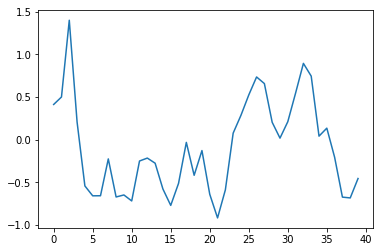

In [194]:
plt.plot(x)

In [202]:
r = pynumdiff.optimize.smooth_finite_difference.butterdiff(x, dt, tvgamma=1)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [203]:
r

([3, 0.07387695312500006], 0.4850556437527084)

In [205]:
data['metadata']

{'dt': 0.1,
 'gammas': [],
 'method': 'butterdiff',
 'method_parent': 'smooth_finite_difference',
 'noise': 0.1,
 'params': [],
 'problem': 'lorenz_x',
 'timeseries_length': 4}

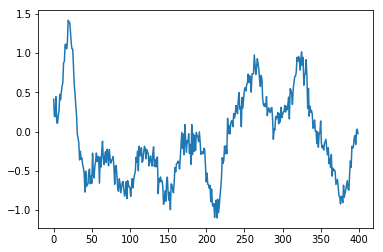

In [189]:
plt.plot(x)

In [124]:
data['metadata']

{'dt': 0.01,
 'freq': 0.01,
 'gammas': [0.00010000000000000009,
  0.0002335721469090123,
  0.0005455594781168522,
  0.001274274985703135,
  0.0029763514416313187,
  0.006951927961775603,
  0.016237767391887214,
  0.0379269019073225,
  0.08858667904100821,
  0.20691380811147872,
  0.4832930238571745,
  1.1288378916846884,
  2.636650898730355,
  6.158482110660253,
  14.384498882876619,
  33.598182862837774,
  78.47599703514598,
  183.29807108324312,
  428.13323987193803,
  999.9999999999998],
 'method': 'butterdiff',
 'method_parent': 'smooth_finite_difference',
 'noise': 0.001,
 'params': [[4, 0.9820312499999979],
  [4, 0.9820312499999979],
  [4, 0.9749999999999981],
  [3, 0.99],
  [3, 0.5246495008468627],
  [3, 0.28075359106063785],
  [3, 0.14181030273437487],
  [3, 0.08434814453125017],
  [3, 0.06738281250000006],
  [3, 0.05804687500000009],
  [3, 0.049187500000000134],
  [3, 0.042285156249999956],
  [3, 0.04000000000000012],
  [3, 0.03782292175292977],
  [4, 0.03749999999999959],
  [